In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [5]:
# Load the dataset
df = pd.read_csv('c:/Users/Rushi/OneDrive/Desktop/Python/Mall_Customers.csv')

In [6]:
# a) Data Preprocessing
# Drop unnecessary columns
df.drop(columns=['CustomerID'], inplace=True)

In [7]:
# Convert categorical variable 'Genre' to numeric
df['Genre'] = df['Genre'].apply(lambda x: 1 if x == 'Male' else 0)

In [8]:
# Select features for clustering (Annual Income and Spending Score)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [9]:
# b) Data Preparation (Train-Test Split)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [10]:
# c) Apply Machine Learning Algorithms

# 1. K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_train)
kmeans_labels = kmeans.predict(X_train)

In [11]:
# Evaluate K-Means using Silhouette Score
silhouette_kmeans = silhouette_score(X_train, kmeans_labels)
print(f"K-Means Silhouette Score: {silhouette_kmeans}")

K-Means Silhouette Score: 0.5502062330283519


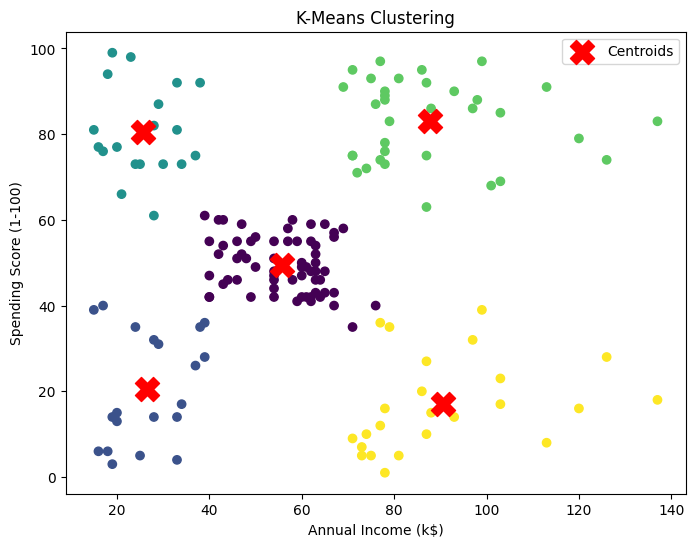

In [12]:
# Plot K-Means Clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_train['Annual Income (k$)'], X_train['Spending Score (1-100)'], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

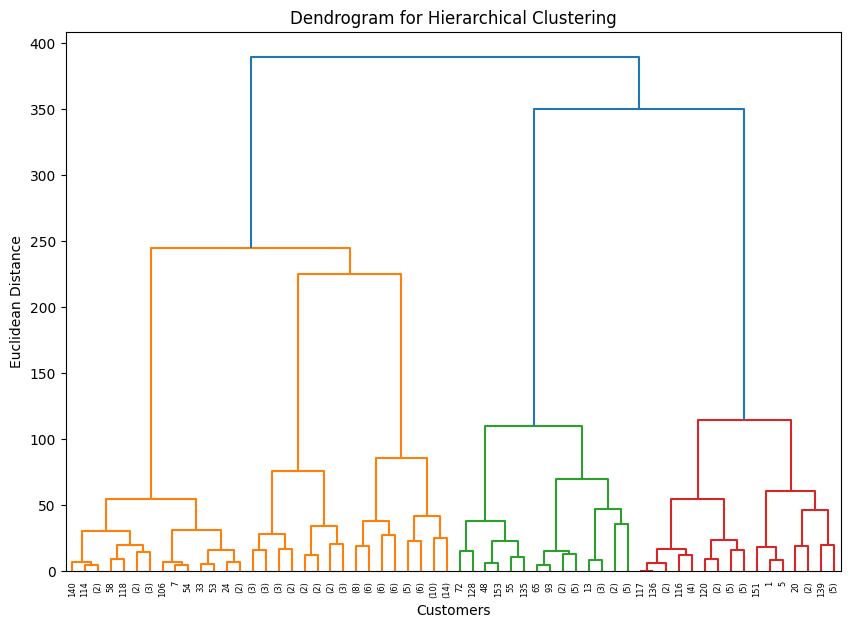

In [13]:
# 2. Hierarchical Clustering
linked = linkage(X_train, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [14]:
# Assign clusters using Hierarchical Clustering
hierarchical_labels = fcluster(linked, t=5, criterion='maxclust')

In [15]:
# Evaluate Hierarchical Clustering using Silhouette Score
silhouette_hierarchical = silhouette_score(X_train, hierarchical_labels)
print(f"Hierarchical Clustering Silhouette Score: {silhouette_hierarchical}")

Hierarchical Clustering Silhouette Score: 0.5446226502499154


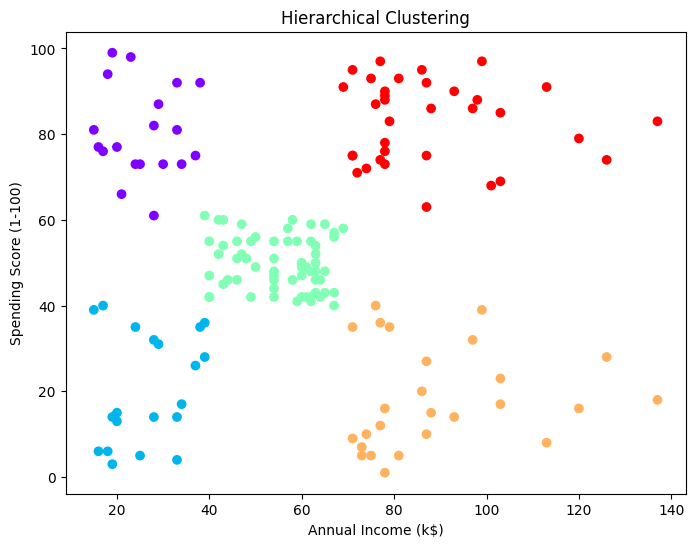

In [16]:
# Plot Hierarchical Clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_train['Annual Income (k$)'], X_train['Spending Score (1-100)'], c=hierarchical_labels, cmap='rainbow')
plt.title('Hierarchical Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [17]:
# d) Evaluate Models
print("Evaluation:")
print(f"K-Means Silhouette Score: {silhouette_kmeans}")
print(f"Hierarchical Clustering Silhouette Score: {silhouette_hierarchical}")

Evaluation:
K-Means Silhouette Score: 0.5502062330283519
Hierarchical Clustering Silhouette Score: 0.5446226502499154


In [18]:
# e) Apply Cross-Validation (for K-Means)
# Note: Cross-validation is not typically used for unsupervised learning, but we can evaluate stability
cv_scores = []
for i in range(2, 10):  # Test different numbers of clusters
    kmeans_cv = KMeans(n_clusters=i, random_state=42)
    kmeans_cv.fit(X_train)
    labels_cv = kmeans_cv.predict(X_train)
    score = silhouette_score(X_train, labels_cv)
    cv_scores.append(score)

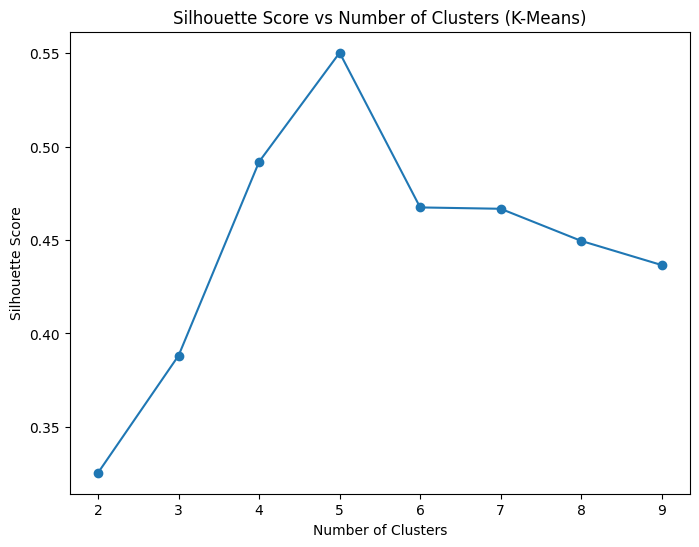

In [19]:
# Plot Cross-Validation Results
plt.figure(figsize=(8, 6))
plt.plot(range(2, 10), cv_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters (K-Means)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()